In [9]:
import os
import sys
import urllib.request
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [10]:
spatial_data = r"C:\Users\Randhir Kumar\Desktop\vit bhopal\project exibition 2\Traffic-Forecasting-using-Graph-Convolution-LSTM-model\Datasets\PEMS_08\PEMS_08_GCN.csv"
temporal_data = r"C:\Users\Randhir Kumar\Desktop\vit bhopal\project exibition 2\Traffic-Forecasting-using-Graph-Convolution-LSTM-model\Datasets\PEMS_08\PEMS_08.csv"

In [11]:
speed_data = pd.read_csv(temporal_data, header=None)
num_nodes, time_len = speed_data.shape
print("No. of sensors:", num_nodes, "\nNo of timesteps:", time_len)

No. of sensors: 170 
No of timesteps: 17856


In [12]:
#using only 1/2th data
span = speed_data.shape[1]//2
speed_data = speed_data.iloc[:, span:span*2]
speed_data.shape

(170, 8928)

In [13]:
speed_data

,8928,8929,8930,8931,8932,8933,8934,8935,8936,8937,...,17846,17847,17848,17849,17850,17851,17852,17853,17854,17855
0,71.2,70.2,70.5,70.0,70.7,70.7,70.1,70.4,70.0,70.2,...,65.0,70.0,67.2,66.9,64.0,63.9,62.7,63.3,61.4,61.7
1,69.5,68.5,69.0,68.7,67.5,68.1,67.0,67.9,66.1,65.0,...,66.2,66.2,66.5,66.3,65.9,66.5,66.7,66.8,67.2,67.6
2,65.7,66.2,66.2,66.1,66.9,66.3,65.9,66.5,65.7,65.5,...,56.9,56.4,57.5,55.7,57.5,54.5,56.1,56.1,58.9,56.3
3,71.0,70.7,69.3,71.9,72.3,73.1,73.8,71.9,70.8,70.4,...,72.1,70.9,68.4,66.5,65.6,63.1,64.5,64.3,65.8,64.7
4,71.2,69.9,71.6,74.0,73.4,71.4,69.7,72.3,73.4,70.6,...,66.2,66.4,64.5,63.8,63.4,64.2,65.4,62.9,59.9,62.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,69.2,67.5,66.6,67.2,68.1,67.9,67.7,67.7,67.5,67.9,...,67.9,69.9,71.2,70.8,71.4,71.7,69.4,69.0,70.6,68.9
166,64.7,65.2,64.2,63.8,64.2,63.1,64.2,64.8,64.8,65.1,...,65.1,64.9,65.0,64.9,65.0,65.1,65.1,64.6,64.0,64.0
167,68.9,68.6,68.3,69.0,67.4,68.8,68.1,68.3,66.0,67.9,...,28.4,56.7,44.4,38.4,47.5,37.6,51.0,32.2,30.8,59.1
168,68.8,68.0,68.9,69.8,68.8,68.6,67.7,68.9,68.9,69.9,...,65.1,65.9,67.3,68.5,67.1,66.9,65.6,66.4,67.5,66.6


In [14]:
sensor_dist_adj = pd.read_csv(spatial_data, index_col=None, header=None)
sensor_dist_adj

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
1,0.0,0.0000,0.3716,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
2,0.0,0.3716,0.0000,0.0,0.3381,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
3,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
4,0.0,0.0000,0.3381,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
166,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
167,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3652,0.0,0.0,0.0000,0.1724,0.0
168,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.1724,0.0000,0.0


In [15]:
def train_test_split(data, train_portion):
    time_len = data.shape[1]
    train_size = int(time_len * train_portion)
    train_data = np.array(data.iloc[:, :train_size])
    test_data = np.array(data.iloc[:, train_size:])
    return train_data, test_data

In [16]:
train_rate = 0.8

In [17]:
train_data, test_data = train_test_split(speed_data, train_rate)
print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (170, 7142)
Test data:  (170, 1786)


In [2]:
def scale_data(train_data, test_data):
    max_speed = train_data.max()
    min_speed = train_data.min()
    train_scaled = (train_data - min_speed) / (max_speed - min_speed)
    test_scaled = (test_data - min_speed) / (max_speed - min_speed)
    return train_scaled, test_scaled


In [19]:
train_scaled, test_scaled = scale_data(train_data, test_data)

In [20]:
seq_len = 20
pre_len = 23

In [21]:
def sequence_data_preparation(seq_len, pre_len, train_data, test_data):
    trainX, trainY, testX, testY = [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        trainX.append(a[:, :seq_len])
        trainY.append(a[:, -1])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        testX.append(b[:, :seq_len])
        testY.append(b[:, -1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)

    return trainX, trainY, testX, testY

In [22]:
trainX, trainY, testX, testY = sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(7100, 170, 20)
(7100, 170)
(1744, 170, 20)
(1744, 170)


In [23]:
from stellargraph.layer import GCN_LSTM

In [24]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=sensor_dist_adj,
    gc_layer_sizes=[16, 10],
    gc_activations=["relu", "relu"],
    lstm_layer_sizes=[200, 200],
    lstm_activations=["tanh", "tanh"],
)

C:\Users\Randhir Kumar\AppData\Local\Temp\ipykernel_23420\324283869.py:1: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


In [25]:
x_input, x_output = gcn_lstm.in_out_tensors()

In [26]:
model = Model(inputs=x_input, outputs=x_output)

In [27]:
model.compile(optimizer="adam", loss="mae", metrics=["mse"])

In [28]:
history = model.fit(
    trainX,
    trainY,
    epochs=25,
    batch_size=60,
    shuffle=True,
    verbose=1,
    validation_data=[testX, testY],
)

Epoch 1/25
119/119 [==============================] - 26s 129ms/step - loss: 0.0741 - mse: 0.0132 - val_loss: 0.0415 - val_mse: 0.0073
Epoch 2/25
119/119 [==============================] - 13s 106ms/step - loss: 0.0500 - mse: 0.0076 - val_loss: 0.0391 - val_mse: 0.0069
Epoch 3/25
119/119 [==============================] - 13s 109ms/step - loss: 0.0456 - mse: 0.0070 - val_loss: 0.0388 - val_mse: 0.0064
Epoch 4/25
119/119 [==============================] - 14s 117ms/step - loss: 0.0421 - mse: 0.0063 - val_loss: 0.0350 - val_mse: 0.0061
Epoch 5/25
119/119 [==============================] - 14s 119ms/step - loss: 0.0402 - mse: 0.0060 - val_loss: 0.0361 - val_mse: 0.0067
Epoch 6/25
119/119 [==============================] - 18s 148ms/step - loss: 0.0391 - mse: 0.0058 - val_loss: 0.0344 - val_mse: 0.0062
Epoch 7/25
119/119 [==============================] - 15s 124ms/step - loss: 0.0382 - mse: 0.0057 - val_loss: 0.0332 - val_mse: 0.0059
Epoch 8/25
119/119 [==============================] - 1

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 170, 20)]         0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 170, 20, 1)        0         
 )                                                               
                                                                 
 reshape (Reshape)           (None, 170, 20)           0         
                                                                 
 fixed_adjacency_graph_conv  (None, 170, 16)           29390     
 olution (FixedAdjacencyGra                                      
 phConvolution)                                                  
                                                                 
 fixed_adjacency_graph_conv  (None, 170, 10)           29230     
 olution_1 (FixedAdjacencyG                                  

In [30]:
print(
    "Train loss: ",
    history.history["loss"][-1],
    "\nTest loss:",
    history.history["val_loss"][-1],
)

Train loss:  0.033632319420576096 
Test loss: 0.031656280159950256


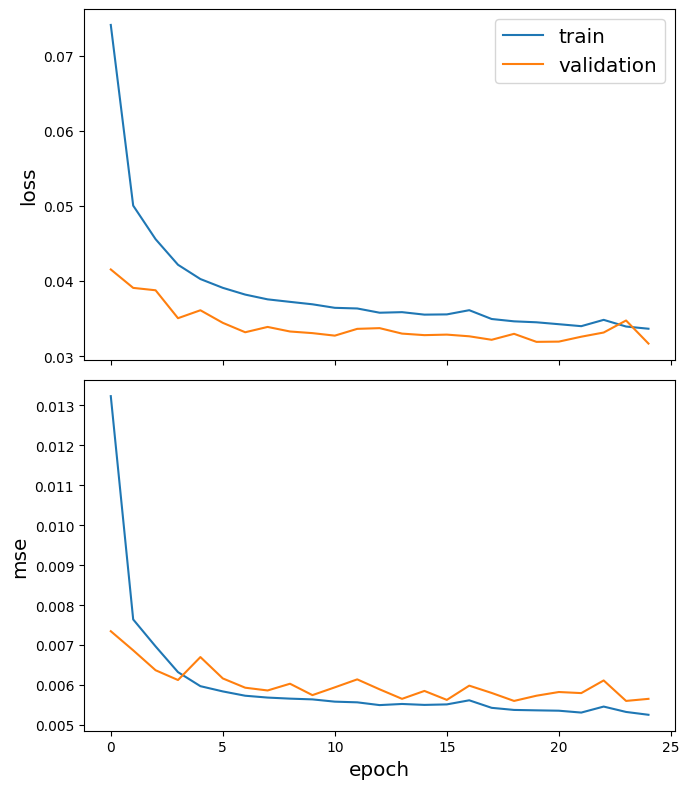

In [31]:
import stellargraph as sg
sg.utils.plot_history(history)

In [32]:
ythat = model.predict(trainX)
yhat = model.predict(testX)

55/55 [==============================] - 2s 35ms/step


In [33]:
## Rescale values
max_speed = train_data.max()
min_speed = train_data.min()

## actual train and test values
train_rescref = np.array(trainY * max_speed)
test_rescref = np.array(testY * max_speed)

In [34]:
## Rescale model predicted values
train_rescpred = np.array((ythat) * max_speed)
test_rescpred = np.array((yhat) * max_speed)

In [35]:
## Naive prediction benchmark (using previous observed value)

testnpred = np.array(testX)[
    :, :, -1
]  # picking the last speed of the 10 sequence for each segment in each sample
testnpredc = (testnpred) * max_speed

In [36]:
## Performance measures

seg_mael = []
seg_masel = []
seg_nmael = []

for j in range(testX.shape[-1]):

    seg_mael.append(
        np.mean(np.abs(test_rescref.T[j] - test_rescpred.T[j]))
    )  # Mean Absolute Error for NN
    seg_nmael.append(
        np.mean(np.abs(test_rescref.T[j] - testnpredc.T[j]))
    )  # Mean Absolute Error for naive prediction
    if seg_nmael[-1] != 0:
        seg_masel.append(
            seg_mael[-1] / seg_nmael[-1]
        )  # Ratio of the two: Mean Absolute Scaled Error
    else:
        seg_masel.append(np.NaN)

print("Total (ave) MAE for NN: " + str(np.mean(np.array(seg_mael))))
print("Total (ave) MAE for naive prediction: " + str(np.mean(np.array(seg_nmael))))
print(
    "Total (ave) MASE for per-segment NN/naive MAE: "
    + str(np.nanmean(np.array(seg_masel)))
)
print(
    "...note that MASE<1 (for a given segment) means that the NN prediction is better than the naive prediction."
)

Total (ave) MAE for NN: 4.34134821894448
Total (ave) MAE for naive prediction: 5.246205773607216
Total (ave) MASE for per-segment NN/naive MAE: 0.8135952605372717
...note that MASE<1 (for a given segment) means that the NN prediction is better than the naive prediction.


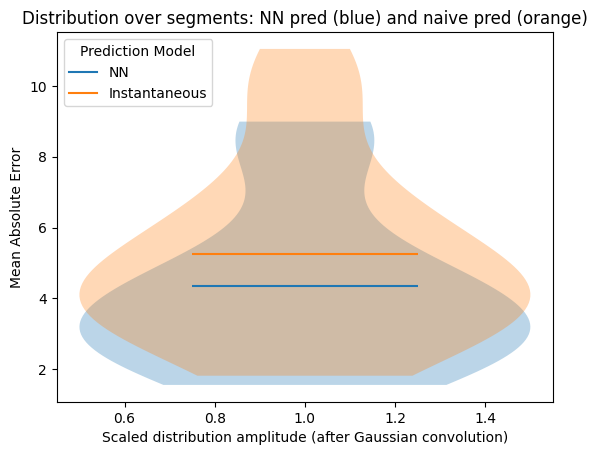

In [37]:
# plot violin plot of MAE for naive and NN predictions
fig, ax = plt.subplots()
# xl = minsl

ax.violinplot(
    list(seg_mael), showmeans=True, showmedians=False, showextrema=False, widths=1.0
)

ax.violinplot(
    list(seg_nmael), showmeans=True, showmedians=False, showextrema=False, widths=1.0
)

line1 = mlines.Line2D([], [], label="NN")
line2 = mlines.Line2D([], [], color="C1", label="Instantaneous")

ax.set_xlabel("Scaled distribution amplitude (after Gaussian convolution)")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Distribution over segments: NN pred (blue) and naive pred (orange)")
plt.legend(handles=(line1, line2), title="Prediction Model", loc=2)
plt.show()

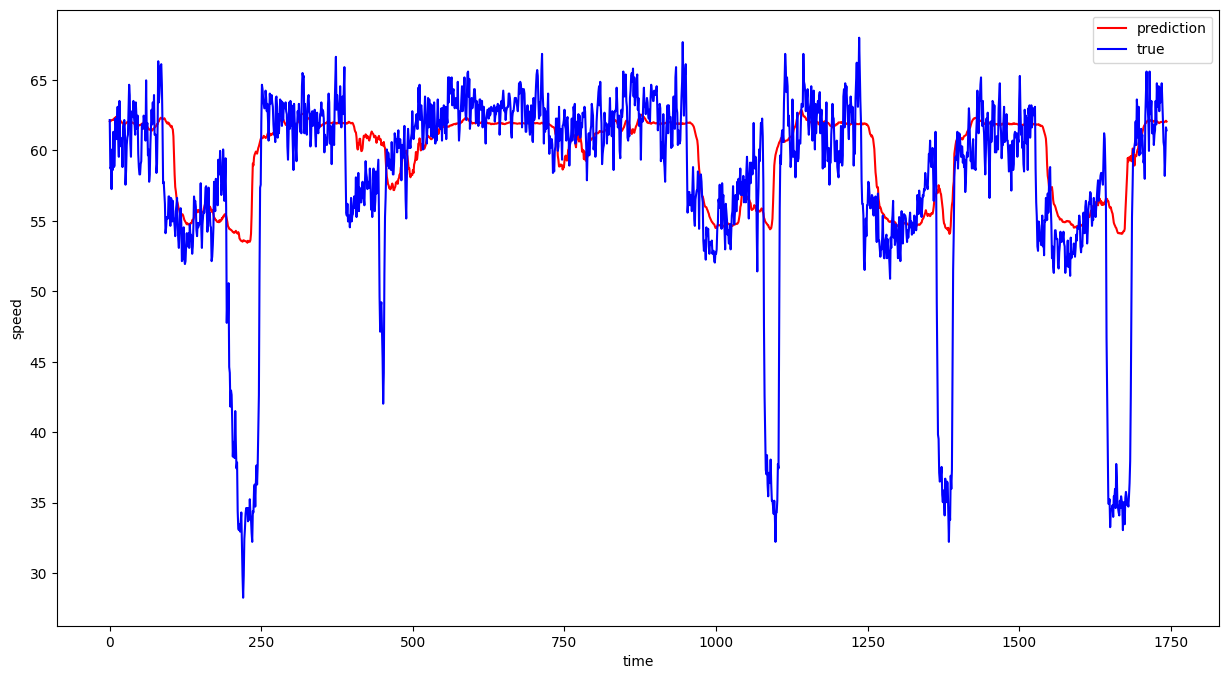

In [38]:
##all test result visualization
fig1 = plt.figure(figsize=(15, 8))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = test_rescpred[:, 100]
a_true = test_rescref[:, 100]
plt.plot(a_pred, "r-", label="prediction")
plt.plot(a_true, "b-", label="true")
plt.xlabel("time")
plt.ylabel("speed")
plt.legend(loc="best", fontsize=10)
plt.show()